# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [4]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [5]:
# import the data
data = pd.read_csv('Wholesale_Data.csv')

In [9]:
# view the data
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# drop channel and Region since we do not need these
data = data.iloc[:, 2:]

In [121]:
# check the shape of the data
data.shape

(440, 6)

# Data Cleaning

In [122]:
# examine data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [123]:
data.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

From the info shown, we can see that we have no missing values in the data given that we have 440 entries for all variables. This matches the number of entries in the data. The info also shows that our data are all numeric.

In [124]:
# check the statistical description of the data
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The statistical description shows that there is a large gap between the min and max, hence we will be scaling the data.

# Data Visualization

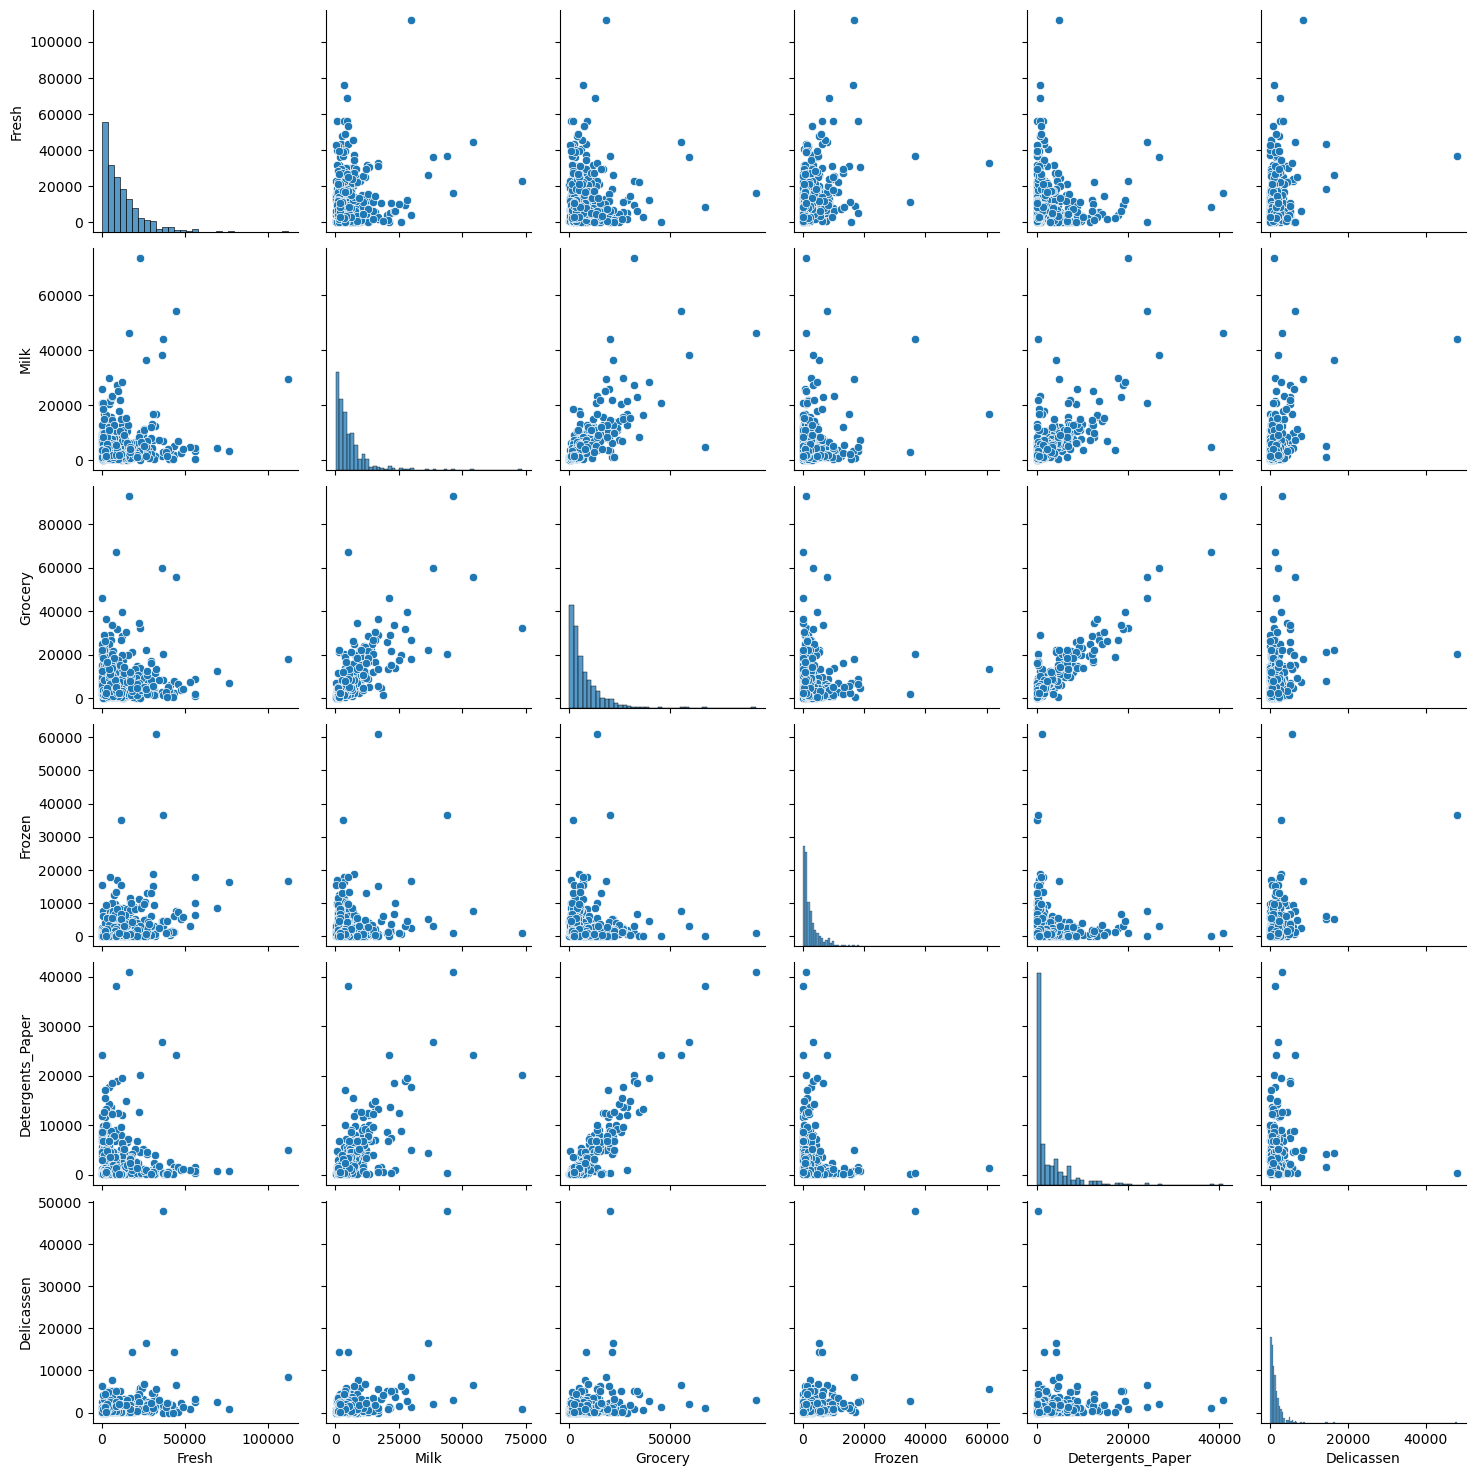

In [126]:
# plot the scatter plot
sns.pairplot(data)
plt.show()

From the scatter plot we can see that there is a strong relationship between grocery and detergent_paper, milk and grocery. The correlation matrix will be used to further see this relationship.

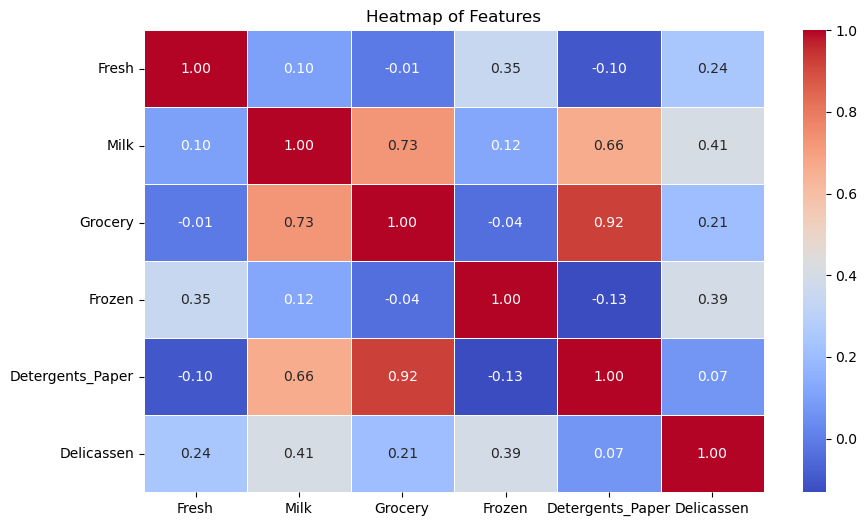

In [130]:
# Set up the figure size
plt.figure(figsize=(10, 6))

c = data.corr()

# Create a heatmap
sns.heatmap(c, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Heatmap of Features")
plt.show()


<Figure size 1200x800 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

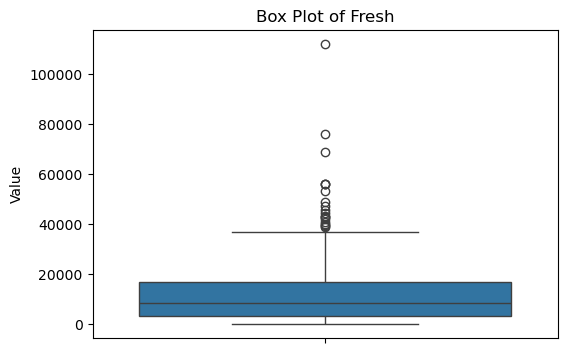

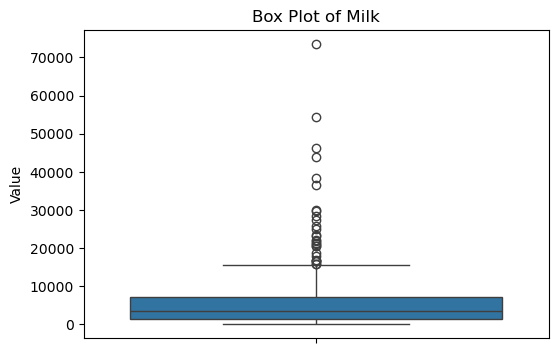

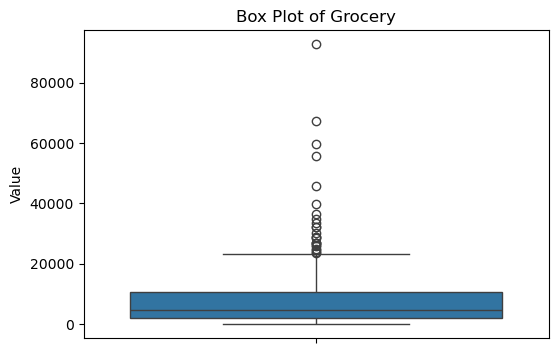

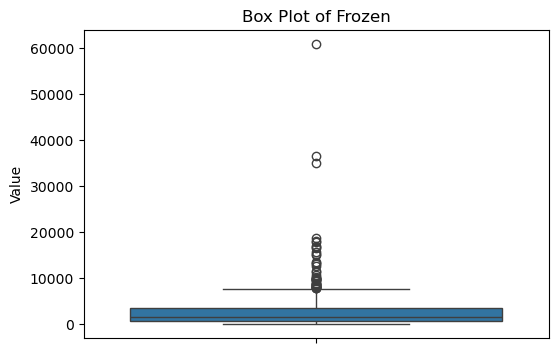

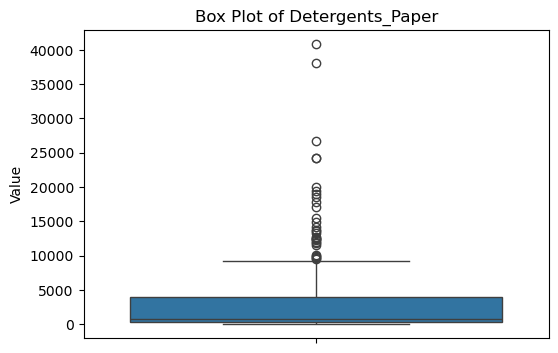

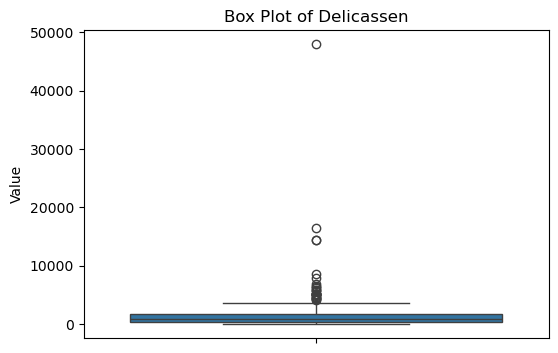

In [ ]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Loop through each numeric column and plot a box plot
for col in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel("Value")
    plt.show()

In [254]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler # using MinMax since our data is skewed
mm_scaler = MinMaxScaler()

scaled = mm_scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled, columns=data.columns)

In [255]:
data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [262]:
# Fit the model
# import Kmeans from sklearn
from sklearn.cluster import KMeans

km2 = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km2 = km2.fit_predict(data_scaled)


c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [259]:
# with n_clusters = 3

km3 = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km3 = km3.fit_predict(data_scaled)


c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [260]:
# view columns
data_scaled.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [263]:
# view clusters
km2.cluster_centers_

array([[0.10807842, 0.05549498, 0.05959193, 0.05036277, 0.04099513,
        0.02725757],
       [0.09777069, 0.26780068, 0.30373426, 0.0476947 , 0.31730292,
        0.06927054]])

In [264]:
# view the mean compare with clusters
data_scaled.mean()

Fresh               0.106977
Milk                0.078173
Grocery             0.085671
Frozen              0.050078
Detergents_Paper    0.070510
Delicassen          0.031745
dtype: float64

In [265]:
# put in dataframe
clusters2 = pd.DataFrame(km2.cluster_centers_, columns=data_scaled.columns)
clusters2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.108078,0.055495,0.059592,0.050363,0.040995,0.027258
1,0.097771,0.267801,0.303734,0.047695,0.317303,0.069271


In [267]:
km3.cluster_centers_

array([[0.07322978, 0.05404138, 0.05925095, 0.04010369, 0.04370571,
        0.02308427],
       [0.07395868, 0.25816527, 0.30795838, 0.03082174, 0.33558914,
        0.04721432],
       [0.31612924, 0.08086923, 0.07042464, 0.11874307, 0.02650803,
        0.06815213]])

In [268]:
# put in dataframe
clusters3 = pd.DataFrame(km3.cluster_centers_, columns=data_scaled.columns)
clusters3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.073230,0.054041,0.059251,0.040104,0.043706,0.023084
1,0.073959,0.258165,0.307958,0.030822,0.335589,0.047214
2,0.316129,0.080869,0.070425,0.118743,0.026508,0.068152


In [ ]:
# Cluster 0: from the first cluster, they spend money on fresh produce

# The Elbow Rule (Inertia)

In [269]:
def plot_distortion(X,max_clusters = 15):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 


c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

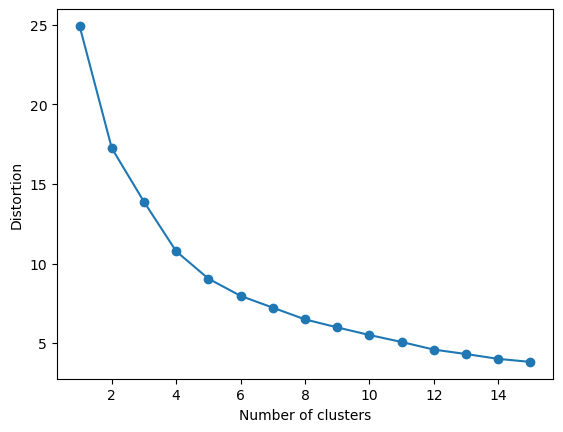

In [270]:
plot_distortion(data_scaled, max_clusters=15)

From the graph above the sharp decline happened between K=1 to K=4. After K=4, the decline became flat

In [271]:
# Using K=4
# Fit the model
# import Kmeans from sklearn
from sklearn.cluster import KMeans

km4 = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km4 = km4.fit_predict(data_scaled)

c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [272]:
km4.cluster_centers_

array([[0.05181527, 0.14567365, 0.18337739, 0.02360488, 0.1801257 ,
        0.03889786],
       [0.33295151, 0.08326185, 0.06819889, 0.13463056, 0.02350616,
        0.0690326 ],
       [0.14232889, 0.47184211, 0.52312427, 0.04979291, 0.60925436,
        0.06132249],
       [0.08250686, 0.04140516, 0.04162617, 0.04329911, 0.02441323,
        0.02157024]])

In [273]:
data_scaled.mean()

Fresh               0.106977
Milk                0.078173
Grocery             0.085671
Frozen              0.050078
Detergents_Paper    0.070510
Delicassen          0.031745
dtype: float64

In [274]:
# put in dataframe
clusters4 = pd.DataFrame(km4.cluster_centers_, columns=data_scaled.columns)
clusters4

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.051815,0.145674,0.183377,0.023605,0.180126,0.038898
1,0.332952,0.083262,0.068199,0.134631,0.023506,0.069033
2,0.142329,0.471842,0.523124,0.049793,0.609254,0.061322
3,0.082507,0.041405,0.041626,0.043299,0.024413,0.021570


In [275]:
# find the number of clients in each cluster
from collections import Counter

Counter(km4.labels_)

Counter({3: 285, 0: 93, 1: 52, 2: 10})

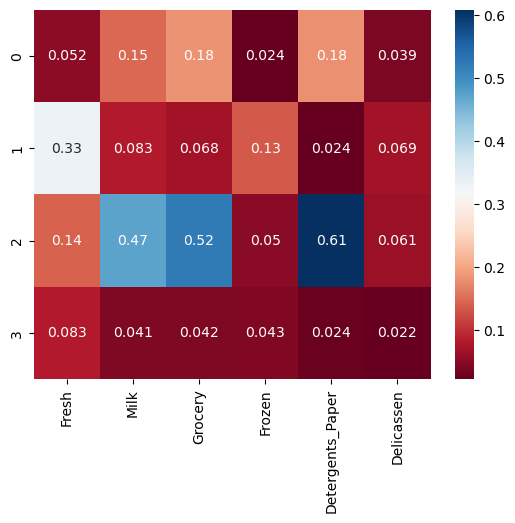

In [276]:
# using heatmap to visualize the data since this not a 2D
sns.heatmap(clusters4, cmap='RdBu', annot=True)
plt.show()

From the above, we see the segementation for our clients that belong to different clusters.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [277]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 3)


In [278]:
y_hc = ac.fit_predict(data_scaled)

In [280]:
Counter(ac.labels_) # check customers in each cluster

Counter({0: 310, 1: 125, 2: 5})

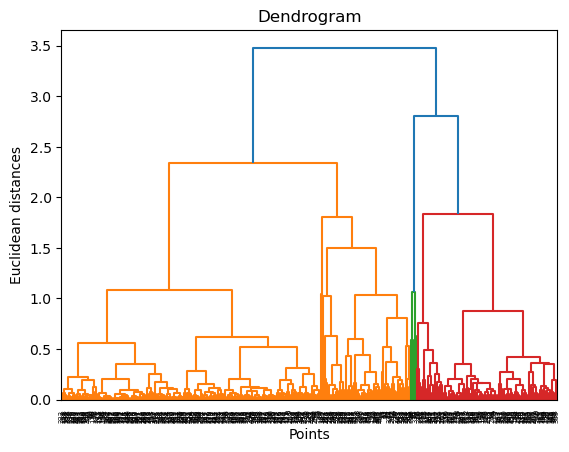

In [281]:
# define plot_dendrogram function
#def plot_dendrogram(X,method ='ward'):
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel('Points')
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [282]:
from sklearn.decomposition import PCA

# define the pca with no components
pca = PCA(n_components=None)
X_pca = pca.fit_transform(data_scaled)

In [283]:
# put in dataframe
data_pca = pd.DataFrame(data=X_pca)
data_pca

,0,1,2,3,4,5
0,0.020446,-0.004124,-0.016385,0.063104,-0.019377,-0.001216
1,0.045003,-0.036889,0.024454,0.040770,-0.012277,0.005376
2,0.040474,-0.013746,0.079127,0.062867,0.093314,-0.034844
3,-0.092295,0.028786,0.027925,-0.042360,0.010803,0.006455
4,-0.020514,0.106330,-0.004159,0.022854,0.059236,-0.005439
...,...,...,...,...,...,...
435,0.044462,0.228619,0.070570,-0.032900,-0.048749,0.094826
436,-0.121570,0.220951,-0.097728,-0.001808,0.015493,-0.024559
437,0.393949,-0.010093,-0.078571,-0.038514,0.019903,-0.007155
438,-0.102185,-0.024537,-0.006867,0.026183,0.025020,-0.004587


In [284]:
# check the correlation
data_pca.corr()

,0,1,2,3,4,5
0,1.000000e+00,3.865424e-16,6.968070e-17,-6.021833e-17,-2.417994e-16,2.151913e-15
1,3.865424e-16,1.000000e+00,1.592961e-16,7.376780e-18,-3.273505e-16,-5.320753e-16
2,6.968070e-17,1.592961e-16,1.000000e+00,-8.690200e-17,-9.166883e-17,6.807766e-16
3,-6.021833e-17,7.376780e-18,-8.690200e-17,1.000000e+00,4.232976e-17,-1.610570e-15
4,-2.417994e-16,-3.273505e-16,-9.166883e-17,4.232976e-17,1.000000e+00,1.217745e-15
5,2.151913e-15,-5.320753e-16,6.807766e-16,-1.610570e-15,1.217745e-15,1.000000e+00


In [285]:
# checlk the explained variance
pca.explained_variance_ratio_

array([0.51948323, 0.26407007, 0.106061  , 0.06258016, 0.03497422,
       0.01283132])

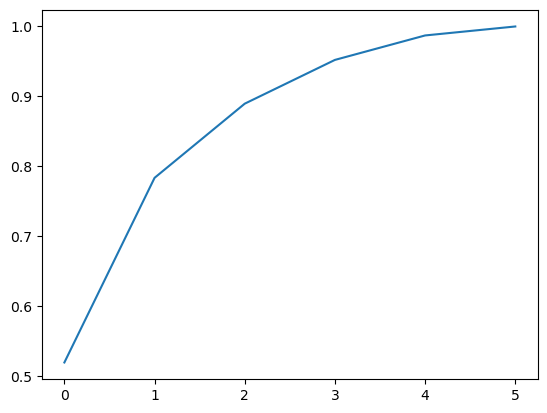

In [286]:
# plot the explained variance
sns.lineplot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

C:\Users\Ikemma\AppData\Local\Temp\ipykernel_31964\2882953410.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(data.columns.values) # labels the x-axis


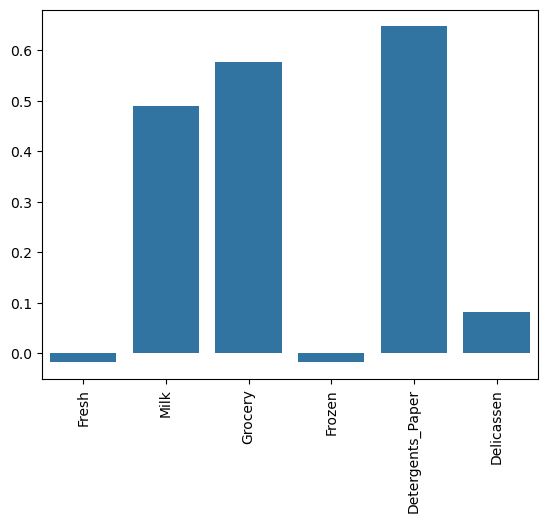

In [287]:
# use barplot to see variables contribution
sns.barplot(pca.components_[0,:])
plt.gca().set_xticklabels(data.columns.values) # labels the x-axis
plt.xticks(rotation=90)
plt.show()

In [288]:
pca2 = PCA(n_components=2) # reducing to 2 for easy visualization
X_pca2 = pca2.fit_transform(data_scaled)

In [289]:
# put in dataframe
data_pca2 = pd.DataFrame(data=X_pca2)
data_pca2

,0,1
0,0.020446,-0.004124
1,0.045003,-0.036889
2,0.040474,-0.013746
3,-0.092295,0.028786
4,-0.020514,0.106330
...,...,...
435,0.044462,0.228619
436,-0.121570,0.220951
437,0.393949,-0.010093
438,-0.102185,-0.024537


In [313]:
pca2.explained_variance_ratio_

array([0.51948323, 0.26407007])

# The Elbow Rule (Inertia)

c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

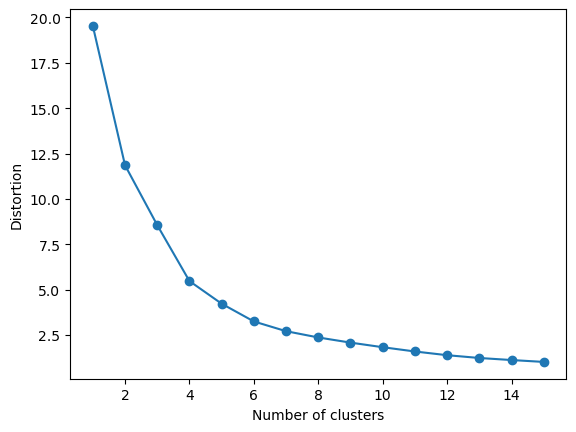

In [291]:
plot_distortion(X_pca2, max_clusters=15)

From the graph above the sharp decline happened between K=1 to K=4. After K=4, the decline became flat

In [294]:
# Using K=4
# Fit the model
# import Kmeans from sklearn
from sklearn.cluster import KMeans

km4 = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=42)

# fit and predict
y_km4 = km4.fit_predict(data_pca2)

c:\Users\Ikemma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [296]:
km4.cluster_centers_

array([[ 0.16126939, -0.05832959],
       [-0.07401544, -0.02476398],
       [ 0.79607443,  0.03866579],
       [-0.03757544,  0.25475726]])

In [318]:
# put in dataframe
clusters4 = pd.DataFrame(km4.cluster_centers_)
clusters4

,0,1
0,0.161269,-0.058330
1,-0.074015,-0.024764
2,0.796074,0.038666
3,-0.037575,0.254757


In [301]:
# find the number of clients in each cluster
from collections import Counter

Counter(km4.labels_)

Counter({1: 288, 0: 94, 3: 48, 2: 10})

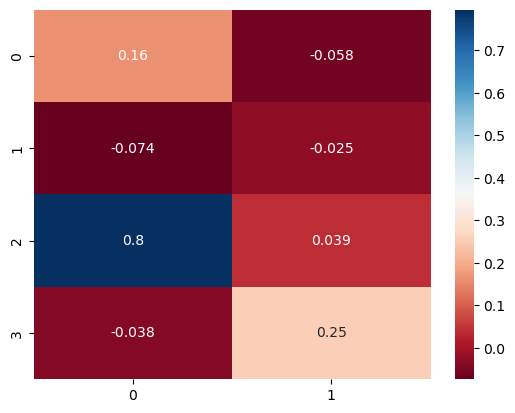

In [302]:
# using heatmap to visualize the data since this not a 2D
sns.heatmap(clusters4, cmap='RdBu', annot=True)
plt.show()

From the above, we see the segementation for our clients that belong to different clusters.

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [303]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 3)


In [305]:
y_hc = ac.fit_predict(data_pca2)

In [306]:
Counter(ac.labels_)

Counter({0: 359, 2: 49, 1: 32})

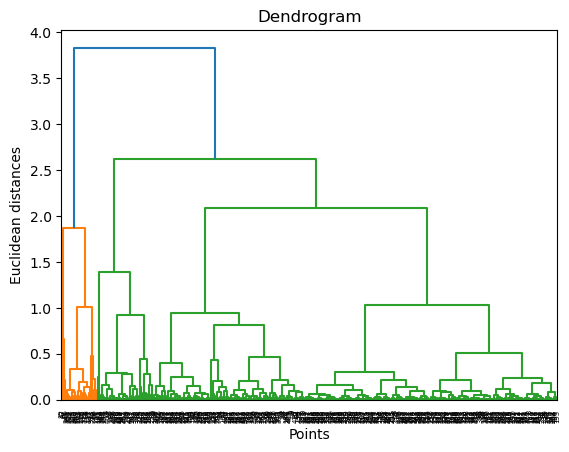

In [308]:
# define plot_dendrogram function
#def plot_dendrogram(X,method ='ward'):
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method='ward'))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel('Points')
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* From the results, we see that there is a srtong relationship between milk and detergent paper, aw weell as between grocery and detergent paper
* The data is mostly skewed to the right, hence we used MinMaxScaler.
* We reduced our fearures to 2 using PCA but these didn't improve our data as can be seen with the explaned variance ratio.
* Using the elbow rule to determine K, the optimal K is 4.
* Using scaled data before applying PCA, the KMeans resukts showed the following:
    * Cluster 0 shows client that buy more milk, grocery and deterent paper
    * Cluster 1 shows clients that buy more of fresh, and less of others.
    * In cluster 2 we see that we have clients that buy a lot of detergents paper, milk and grocery. 
    * Cluster 3 shows client that buy more of every products.
* The optimal number of clusters for hierichal clustering is 3.
